<a href="https://colab.research.google.com/github/BuKarData/pancard/blob/main/Pan_Card_Tampering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [275]:
#importing necesarry packages
from skimage.metrics import structural_similarity #helps in finding structural similarities between objects
import imutils #grabbing contours
import cv2 #image processing
from PIL import Image #downloading and visualizing image
import requests #fetching data from urls

In [276]:
!mkdir pan_card_tampering
!mkdir pan_card_tampering/image

mkdir: cannot create directory ‘pan_card_tampering’: File exists
mkdir: cannot create directory ‘pan_card_tampering/image’: File exists


In [277]:
original = Image.open('pan_card_tampering/image/original.png') #downloading original image
tampered = Image.open('pan_card_tampering/image/tampered.png') #downloading tampered image

In [278]:
#file format of the source files
print("Original image format: ",original.format)
print('Tampered image format: ',tampered.format)

#image size(px), w x h
print('Original image size: ', original.size)
print('Tampered image size: ', tampered.size)

Original image format:  PNG
Tampered image format:  PNG
Original image size:  (250, 160)
Tampered image size:  (250, 160)


In [279]:
#adjusting sizes of images
original = original.resize((250, 160))
print(original.size)
original.save('pan_card_tampering/image/original.png')
tampered = tampered.resize ((250,160))
print(tampered.size)
tampered.save('pan_card_tampering/image/tampered.png')

(250, 160)
(250, 160)


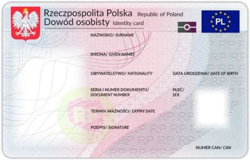

In [280]:
#original document
original

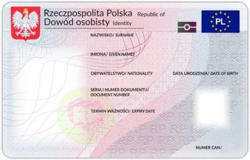

In [281]:
#tampered document
tampered


In [282]:
#loading images to cv2
original = cv2.imread('pan_card_tampering/image/original.png')
tampered = cv2.imread('pan_card_tampering/image/tampered.png')

array([[254, 254, 254, ..., 254, 254, 255],
       [254, 252, 251, ..., 254, 254, 255],
       [254, 254, 254, ..., 255, 254, 255],
       ...,
       [255, 255, 254, ..., 254, 255, 255],
       [255, 254, 253, ..., 254, 254, 255],
       [255, 254, 253, ..., 254, 254, 255]], dtype=uint8)
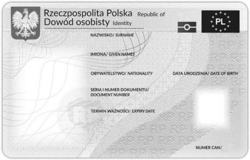

In [283]:
#changing colour to grayscale
original_g = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_g = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)
tampered_g

array([[254, 254, 253, ..., 254, 254, 255],
       [254, 252, 251, ..., 254, 254, 255],
       [254, 254, 253, ..., 254, 254, 255],
       ...,
       [255, 255, 254, ..., 254, 255, 255],
       [255, 254, 253, ..., 254, 254, 255],
       [255, 254, 254, ..., 254, 254, 255]], dtype=uint8)
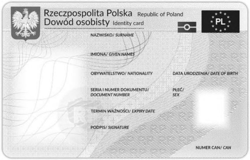

In [284]:
original_g

In [285]:
#computing SSIM between documents with difference image
(score, diff) = structural_similarity(original_g, tampered_g, full = True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))
if score < 1:
    print("possibly tampered")
else:
    print("original")

SSIM: 0.9732699525084177
possibly tampered


In [286]:
#threshold and contours
thersh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1] #getting threshold
cnts = cv2.findContours(thersh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts) #getting contours

In [287]:
for c in cnts:
  #applying contours on the image
  (x, y, w, h) = cv2.boundingRect(c)
  cv2.rectangle(original, (x, y), (x + w, y + h), (0, 0, 255), 2)
  cv2.rectangle(tampered, (x, y), (x + w, y + h), (0, 0, 255), 2)

Original Image


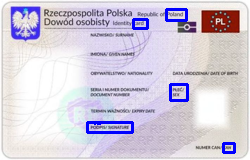

In [288]:
#display original document with contour
print("Original Image")
Image.fromarray(original)

Tampered Image


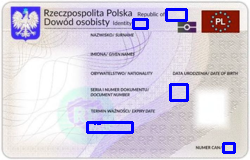

In [289]:
#display tampered document with contour
print("Tampered Image")
Image.fromarray(tampered)

Difference image


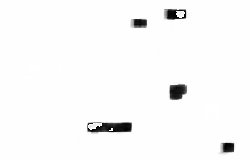

In [290]:
#display difference image
print("Difference image")
Image.fromarray(diff)

Threshold Image


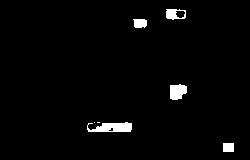

In [291]:
#display threshold image with white
print('Threshold Image')
Image.fromarray(thersh)